In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

from astropy import table
from astropy.table import Table
from astropy.io import ascii

from astroML.plotting import scatter_contour


SAGA_DIR = os.environ['SAGA_DIR']
SAGA_DROPBOX= os.environ['SAGA_DROPBOX']

In [62]:
# READ SPECTRA
file = SAGA_DROPBOX+'/data/saga_spectra_clean.fits.gz'
allspec = Table.read(file)

In [63]:
# FIND GOOD OBJECTS 
m_rmv  = allspec['REMOVE'] == -1
m_fib  = allspec['FIBERMAG_R'] <= 23
m_gal  = allspec['PHOT_SG'] == 'GALAXY'

m_boss = allspec['survey'] != 'boss'

spec=allspec[m_rmv & m_fib & m_gal &m_boss]


In [64]:
# EXPLORE BRIGHT AND FAINT GALAXIES SEPARATELY
m_ff1 = (spec['r'] - spec['EXTINCTION_R']) >19.
m_ff2 = (spec['r'] - spec['EXTINCTION_R']) <=20.75
m_ff=m_ff1 & m_ff2

m_f1 = (spec['r'] - spec['EXTINCTION_R']) >17.7
m_f2 = (spec['r'] - spec['EXTINCTION_R']) <=20.75
m_f  = m_f1 & m_f2 
m_b1  = (spec['r'] - spec['EXTINCTION_R']) < 17.7
m_b2  = (spec['r'] - spec['EXTINCTION_R']) > 15
m_b=m_b1& m_b2

sats = spec['SATS'] == 1
lowz = (spec['SPEC_Z'] > 0.005) & (spec['SPEC_Z'] < 0.015)

print np.sum(sats)
print np.sum(lowz)


161
378


In [65]:
# MAGNITUDES
gmag = spec['g'] - spec['EXTINCTION_G']
rmag = spec['r'] - spec['EXTINCTION_R']
imag = spec['i'] - spec['EXTINCTION_I']

# COLORS
gr = gmag - rmag
ri = rmag - imag

In [69]:
# SET PLOT LIMITS
xl = [-0.3,1.3]
yl=[-0.75,0.9]

xl1 = gr > xl[0]
xl2 = gr < xl[1]
yl1 = ri > yl[0]
yl2 = ri < yl[1]
lims = xl1&xl2&yl1&yl2

tgr = 0.85
tri = 0.55

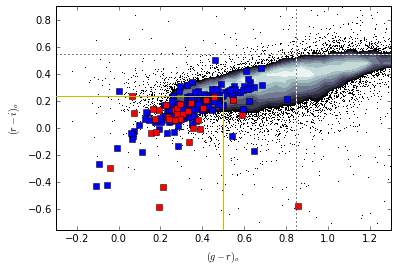

In [88]:
fig, ax1 = plt.subplots(1, 1)

scatter_contour(gr[m_f&lims], ri[m_f&lims], ax=ax1,
                threshold=30, log_counts=True, 
                histogram2d_args=dict(bins=40),
                plot_args=dict(marker=',', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.bone))

ax1.plot(gr[m_b & lowz], ri[m_b & lowz],'bs',zorder=3,label = 'bright: 0.005$<$z$<$0.015')
ax1.plot(gr[m_f & lowz], ri[m_f & lowz],'rs',zorder=3,label = 'faint: 0.005$<$z$<$0.015')
#ax1.plot(gr[m_ff & lowz], ri[m_ff & lowz],'gs',zorder=3,label = 'faint: 0.005$<$z$<$0.015')

ax1.set_xlim(xl)
ax1.set_ylim(yl)
#ax1.text(xl[0]+0.02,yl[1]-0.2,'Bright Galaxies: r $<$ 17.7',fontsize=11)

ax1.axvline(tgr, c='w')
ax1.axvline(tgr, c='k', ls=':')
ax1.axhline(tri, c='w')
ax1.axhline(tri, c='k', ls=':')

# NEW LIMITS
sgr=0.5
sri=0.24
ax1.plot([-10,sgr],[sri,sri], c='y',zorder=4)
ax1.plot([sgr,sgr],[-10,0.25], c='y',zorder=4)

#ax1.axhline(0.3, c='r')

ax1.set_xlabel('$(g-r)_o$')
ax1.set_ylabel('$(r-i)_o$')

In [91]:
m= (gr > sgr) & (ri > sri) & (spec['SATS'] ==1) & (spec['r']-spec['EXTINCTION_R'] > 17.7)& (spec['r']-spec['EXTINCTION_R'] < 20.75)
print np.sum(m)

#m=spec['OBJID'] == 1237662662147638034
#print spec['RA'][m],spec['DEC'][m]



0
